**Part 1: London’s underground resilience**

**I. Topological network**

In this part, you will evaluate the resilience of the London’s underground through the removal of stations that can potentially make the underground vulnerable. Through the procedure outlined below you will investigate which are the stations that are most critical for the functioning of the underground, and which methodology is more appropriate to finding these stations.

In [1]:
import pandas as pd
import networkx as nx
from statistics import mean
import matplotlib.pyplot as plt

**I.1. Centrality measures:**

**Select 3 centrality measures to characterise nodes**, aiming at identifying the most important nodes in this particular network. In addition to giving their definitions, explain what do the measures mean into the context of the underground, and why they will allow you to find the stations that are most crucial for the functioning of the underground. **Compute the measures for your nodes in the network, and give the results in a table for the first 10 ranked nodes for each of the 3 measures**. 

Some examples of centrality measures are:

* Degree centrality
* Closeness centrality
* Betweeness centrality

See lectures for the definitions. Within this section we will review __degree, closeness__ and __betweenness centrality__.

In [2]:
# Read in the edgelist file from csv.
file_network = nx.read_graphml("data/london.graph.xml")

## __Degree centrality__

The degree of a node refers to the number of links connected to it. Let us plot the network again including this new piece of information:

In [3]:
# Let us compute the degree centrality
deg_london_network = nx.degree(file_network)
degree_centrality = pd.DataFrame(deg_london_network, columns=['stations', 'degree'])
degree_centrality = degree_centrality.sort_values(by=['degree'], ascending=False)
degree_centrality[:10]

,stations,degree
5,Stratford,9
50,Bank and Monument,8
229,King's Cross St. Pancras,7
18,Baker Street,7
180,Earl's Court,6
45,Oxford Circus,6
51,Liverpool Street,6
14,Waterloo,6
16,Green Park,6
7,Canning Town,6


## __Closeness centrality__

Let $d_{ij}$ be the geodesic distance (shortest path) between node $i$ and $j$. The mean geodesic distance of node $i$ to all other nodes is given by:

    
\begin{equation} l_{i}=\frac{1}{n} \sum_{j} d_{ij}\end{equation}
    
where $n$ is the total number of nodes.

A node that is very close to most nodes, and has hence low mean geodesic, will be more influential than a node which is far away. This gives rise to the following definition for the closeness centrality of node $i$:

\begin{equation} C_{i}= \frac{1}{l_{i}} = \frac{n}{\sum_{j} d_{ij}}\end{equation}

Let us compute the closeness centrality for each node in dad’s network.

In [4]:
# Lets compute weighted closeness
clos_london_network = nx.closeness_centrality(file_network, distance='distance')
closeness_centrality = pd.DataFrame.from_dict(clos_london_network, columns=['closeness'], orient='index').reset_index()
closeness_centrality = closeness_centrality.sort_values(by=['closeness'], ascending=False)
closeness_centrality.rename(columns={'index': 'stations'}, inplace=True)
closeness_centrality[:10]

,stations,closeness
16,Green Park,0.114778
50,Bank and Monument,0.113572
229,King's Cross St. Pancras,0.113443
15,Westminster,0.112549
14,Waterloo,0.112265
45,Oxford Circus,0.111204
17,Bond Street,0.110988
230,Farringdon,0.110742
312,Angel,0.110742
232,Moorgate,0.110314


## __Betweenness centrality__

The betweenness centrality of a vertex corresponds to the number of shortest paths passing through it among all pairs. Edge betweennness is defined in a similar, where the edge is within the shortest path.

Define $n^{i}_{st}$ as:
    
\begin{equation}
n^{i}_{st}=\begin{cases}
1, & \text{if vertex $i$ lies on the geodesic path from $s$ to $t$}.\\
0, & \text{otherwise}.
  \end{cases}
\end{equation}

Then betweenness centrality can be defined as:
              
\begin{equation}x_{i}=\sum_{st} n^{i}_{st}\end{equation}

However, there may be multiple geodesics from $s$ to $t$ so to account for this we normalise by the number of geodesics from $s$ to $t$, $g_{st}$:

\begin{equation}x_{i}=\sum_{st} \frac {n^{i}_{st}}{g_{st}}\end{equation}

In [5]:
# Let us compute the betweenness centrality for the network
bet_london_network = nx.betweenness_centrality(file_network, weight='distance')
betweenness_centrality = pd.DataFrame.from_dict(bet_london_network, columns=['betweenness'], orient='index').reset_index()
betweenness_centrality = betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
betweenness_centrality[:10]

,stations,betweenness
5,Stratford,0.297846
50,Bank and Monument,0.290489
51,Liverpool Street,0.270807
229,King's Cross St. Pancras,0.255307
14,Waterloo,0.243921
16,Green Park,0.215835
150,Euston,0.208324
15,Westminster,0.203335
18,Baker Street,0.191568
21,Finchley Road,0.165085


**I.2. Impact measures:**

**Find 2 different measures to evaluate the impact of the node removal on the network.** These are global measures referring to the whole network and not to particular nodes or links. 

**Explain whether these two measures to evaluate the impact are specific to the London underground, or whether they would also be useful to evaluate the resilience of any other network.**

**I.3. Node removal:**

For each of the centrality measures selected in 1.- remove at least 10 nodes following two different strategies. 

***A)*** non-sequential removal: using your table in 1.- remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. After each removal, evaluate the impact of the removal using your two measures in 2.-, and proceed until you have removed at least 10 nodes. 

***B)*** sequential: remove the highest ranked node and evaluate the impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked node in the new network and evaluate the impact. Continue until removing at least two nodes. Report the results of the 2 strategies in one plot, and critically discuss the following: 

- which centrality measure reflects better the importance of a station for the functioning of the underground

- which strategy is more effective at studying resilience, and which impact measure is better at assessing the damage after node removal. 

In [6]:
degree_centrality[:10]

,stations,degree
5,Stratford,9
50,Bank and Monument,8
229,King's Cross St. Pancras,7
18,Baker Street,7
180,Earl's Court,6
45,Oxford Circus,6
51,Liverpool Street,6
14,Waterloo,6
16,Green Park,6
7,Canning Town,6


In [7]:
list_avg_glob = []
list_avg_deg = []
top10 = list(degree_centrality.stations[:10])

for i in range(10):
    temp_network = file_network.copy()
    temp_network.remove_node(top10[i])
    degree_F = nx.degree(temp_network)
    nx.set_node_attributes(temp_network, dict(degree_F), 'deg')
    F_deg = [(k[1]['deg']) for k in temp_network.nodes(data=True)]

    unique_degrees = sorted(set(F_deg))

    avg_glob_eff = nx.global_efficiency(temp_network)
    list_avg_glob.append(avg_glob_eff)
    list_avg_deg.append(mean(F_deg))

Text(0.5, 1.0, 'Average Degree After Removal of Nodes (one at a time)\nMax - Min = 0.0150')

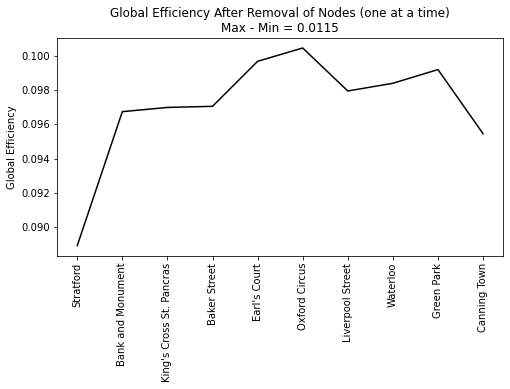

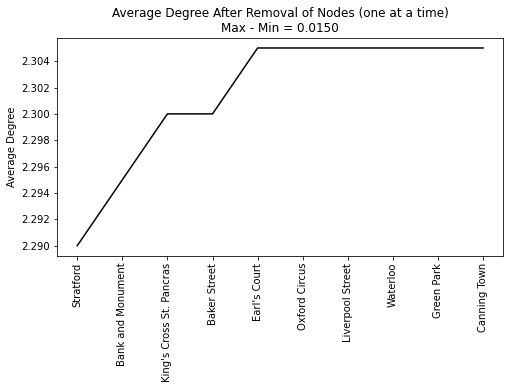

In [8]:
diff_glob_deg_list = []
top10_deg_list_glob = pd.DataFrame(list_avg_glob, columns=['Glob_Eff'])
top10_deg_list_glob['Removed_node'] = top10
max_min_diff_glob = max(top10_deg_list_glob.Glob_Eff) - min(top10_deg_list_glob.Glob_Eff)

top10_deg_list_avg = pd.DataFrame(list_avg_deg, columns=['Average'])
top10_deg_list_avg['Removed_node'] = top10
max_min_diff_avg = max(top10_deg_list_avg.Average) - min(top10_deg_list_avg.Average)

top10_deg_glob_avg = pd.merge(top10_deg_list_glob, top10_deg_list_avg, on='Removed_node')
diff_glob_deg_list.append(max_min_diff_glob)
diff_glob_deg_list.append(max_min_diff_avg)

fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(top10_deg_list_glob.Removed_node, top10_deg_glob_avg.Glob_Eff, color="k")
plt.plot()
plt.ylabel('Global Efficiency')
plt.xticks(rotation=90)
plt.title(f'Global Efficiency After Removal of Nodes (one at a time)\nMax - Min = {max_min_diff_glob:.4f}')

fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(top10_deg_list_avg.Removed_node, top10_deg_glob_avg.Average, color="k")
plt.ylabel('Average Degree')
plt.xticks(rotation=90)
plt.title(f'Average Degree After Removal of Nodes (one at a time)\nMax - Min = {max_min_diff_avg:.4f}')

In [9]:
closeness_centrality[:10]

,stations,closeness
16,Green Park,0.114778
50,Bank and Monument,0.113572
229,King's Cross St. Pancras,0.113443
15,Westminster,0.112549
14,Waterloo,0.112265
45,Oxford Circus,0.111204
17,Bond Street,0.110988
230,Farringdon,0.110742
312,Angel,0.110742
232,Moorgate,0.110314


In [10]:
list_avg_glob = []
list_avg_deg = []
top10 = list(closeness_centrality.stations[:10])

for i in range(10):
    temp_network = file_network.copy()
    temp_network.remove_node(top10[i])

    degree_F = nx.degree(temp_network)
    nx.set_node_attributes(temp_network, dict(degree_F), 'deg')
    F_deg = [(k[1]['deg']) for k in temp_network.nodes(data=True)]

    unique_degrees = sorted(set(F_deg))

    avg_glob_eff = nx.global_efficiency(temp_network)
    list_avg_glob.append(avg_glob_eff)
    list_avg_deg.append(mean(F_deg))

Text(0.5, 1.0, 'Average Degree After Removal of Nodes (one at a time)\nMax - Min = 0.0300')

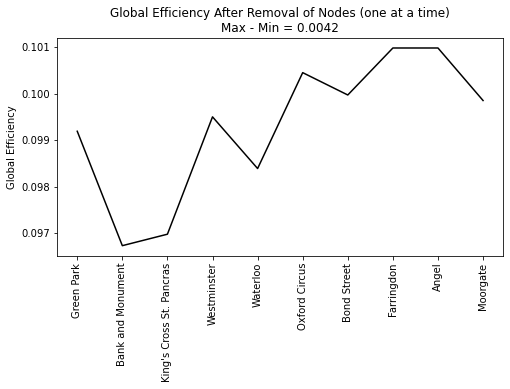

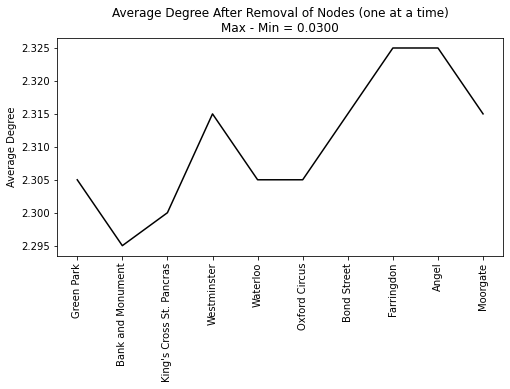

In [11]:
top10_clos_list_glob = pd.DataFrame(list_avg_glob, columns=['Glob_Eff'])
top10_clos_list_glob['Removed_node'] = top10
max_min_diff_glob = max(top10_clos_list_glob.Glob_Eff) - min(top10_clos_list_glob.Glob_Eff)

top10_clos_list_avg = pd.DataFrame(list_avg_deg, columns=['Average'])
top10_clos_list_avg['Removed_node'] = top10
max_min_diff_avg = max(top10_clos_list_avg.Average) - min(top10_clos_list_avg.Average)

top10_clos_glob_avg = pd.merge(top10_clos_list_glob, top10_clos_list_avg, on='Removed_node')
diff_glob_deg_list.append(max_min_diff_glob)
diff_glob_deg_list.append(max_min_diff_avg)

fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(top10_clos_list_glob.Removed_node, top10_clos_glob_avg.Glob_Eff, color="k")
plt.ylabel('Global Efficiency')
plt.xticks(rotation=90)
plt.title(f'Global Efficiency After Removal of Nodes (one at a time)\nMax - Min = {max_min_diff_glob:.4f}')

fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(top10_clos_list_avg.Removed_node, top10_clos_glob_avg.Average, color="k")
plt.ylabel('Average Degree')
plt.xticks(rotation=90)
plt.title(f'Average Degree After Removal of Nodes (one at a time)\nMax - Min = {max_min_diff_avg:.4f}')

In [12]:
betweenness_centrality[:10]

,stations,betweenness
5,Stratford,0.297846
50,Bank and Monument,0.290489
51,Liverpool Street,0.270807
229,King's Cross St. Pancras,0.255307
14,Waterloo,0.243921
16,Green Park,0.215835
150,Euston,0.208324
15,Westminster,0.203335
18,Baker Street,0.191568
21,Finchley Road,0.165085


In [13]:
list_avg_glob = []
list_avg_deg = []
top10 = list(betweenness_centrality.stations[:10])

for i in range(10):
    temp_network = file_network.copy()
    temp_network.remove_node(top10[i])

    degree_F = nx.degree(temp_network)
    nx.set_node_attributes(temp_network, dict(degree_F), 'deg')
    F_deg = [(k[1]['deg']) for k in temp_network.nodes(data=True)]

    unique_degrees = sorted(set(F_deg))

    avg_clust_glob = nx.global_efficiency(temp_network)
    list_avg_glob.append(avg_clust_glob)
    list_avg_deg.append(mean(F_deg))

Text(0.5, 1.0, 'Average Degree After Removal of Nodes (one at a time)\nMax - Min = 0.0250')

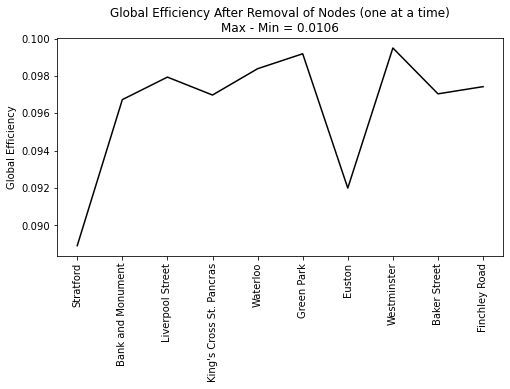

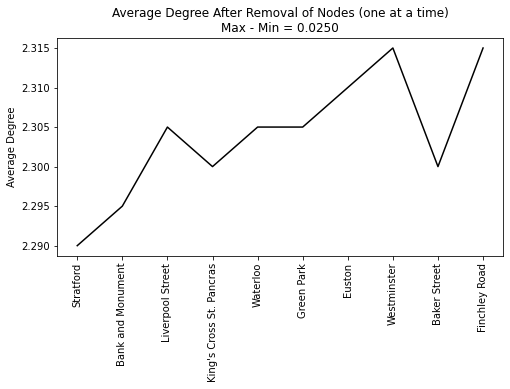

In [14]:
top10_bet_list_glob = pd.DataFrame(list_avg_glob, columns=['Glob_Eff'])
top10_bet_list_glob['Removed_node'] = top10
max_min_diff_glob = max(top10_bet_list_glob.Glob_Eff) - min(top10_bet_list_glob.Glob_Eff)

top10_bet_list_avg = pd.DataFrame(list_avg_deg, columns=['Average'])
top10_bet_list_avg['Removed_node'] = top10
max_min_diff_avg = max(top10_bet_list_avg.Average) - min(top10_bet_list_avg.Average)

top10_bet_glob_avg = pd.merge(top10_bet_list_glob, top10_bet_list_avg, on='Removed_node')
diff_glob_deg_list.append(max_min_diff_glob)
diff_glob_deg_list.append(max_min_diff_avg)

fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(top10_bet_list_glob.Removed_node, top10_bet_glob_avg.Glob_Eff, color="k")
plt.ylabel('Global Efficiency')
plt.xticks(rotation=90)
plt.title(f'Global Efficiency After Removal of Nodes (one at a time)\nMax - Min = {max_min_diff_glob:.4f}')

fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(top10_bet_list_avg.Removed_node, top10_bet_glob_avg.Average, color="k")
plt.ylabel('Average Degree')
plt.xticks(rotation=90)
plt.title(f'Average Degree After Removal of Nodes (one at a time)\nMax - Min = {max_min_diff_avg:.4f}')

In [15]:
#-----------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------#

In [16]:
top1 = degree_centrality.stations[5]

temp_network_deg = file_network.copy()
temp_network_deg.remove_node(top1)
degree_F = nx.degree(temp_network_deg)
nx.set_node_attributes(temp_network_deg, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_deg.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_deg)
avg_deg = mean(F_deg)
deg_glob_avg_1 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [17]:
temp_deg_london_network = nx.degree(temp_network_deg)
temp_degree_centrality = pd.DataFrame(temp_deg_london_network, columns=['stations', 'degree'])
temp_degree_centrality = temp_degree_centrality.sort_values(by=['degree'], ascending=False)
#temp_degree_centrality[:10]

In [18]:
# Lets compute weighted closeness
temp_clos_london_network = nx.closeness_centrality(temp_network_deg, distance='distance')
temp_closeness_centrality = pd.DataFrame.from_dict(temp_clos_london_network, columns=['closeness'], orient='index').reset_index()
temp_closeness_centrality = temp_closeness_centrality.sort_values(by=['closeness'], ascending=False)
temp_closeness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_closeness_centrality[:10]

In [19]:
# Let us compute the betweenness centrality for the network
temp_bet_london_network = nx.betweenness_centrality(temp_network_deg, weight='distance', normalized=False)
temp_betweenness_centrality = pd.DataFrame.from_dict(temp_bet_london_network, columns=['betweenness'], orient='index').reset_index()
temp_betweenness_centrality = temp_betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
temp_betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_betweenness_centrality[:10]

In [20]:
top1 = degree_centrality.stations[50]

temp_network_deg_deg = temp_network_deg.copy()
temp_network_deg_deg.remove_node(top1)
degree_F = nx.degree(temp_network_deg_deg)
nx.set_node_attributes(temp_network_deg_deg, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_deg_deg.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_deg_deg)
avg_deg = mean(F_deg)
deg_glob_avg_2 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [21]:
temp_deg_london_network = nx.degree(temp_network_deg_deg)
temp_degree_centrality = pd.DataFrame(temp_deg_london_network, columns=['stations', 'degree'])
temp_degree_centrality = temp_degree_centrality.sort_values(by=['degree'], ascending=False)
#temp_degree_centrality[:10]

In [22]:
# Lets compute weighted closeness
temp_clos_london_network = nx.closeness_centrality(temp_network_deg_deg, distance='distance')
temp_closeness_centrality = pd.DataFrame.from_dict(temp_clos_london_network, columns=['closeness'], orient='index').reset_index()
temp_closeness_centrality = temp_closeness_centrality.sort_values(by=['closeness'], ascending=False)
temp_closeness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_closeness_centrality[:10]

In [23]:
# Let us compute the betweenness centrality for the network
temp_bet_london_network = nx.betweenness_centrality(temp_network_deg_deg, weight='distance', normalized=False)
temp_betweenness_centrality = pd.DataFrame.from_dict(temp_bet_london_network, columns=['betweenness'], orient='index').reset_index()
temp_betweenness_centrality = temp_betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
temp_betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_betweenness_centrality[:10]

In [24]:
top1 = degree_centrality.stations[229]

temp_network_deg_deg_deg = temp_network_deg_deg.copy()
temp_network_deg_deg_deg.remove_node(top1)
degree_F = nx.degree(temp_network_deg_deg_deg)
nx.set_node_attributes(temp_network_deg_deg_deg, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_deg_deg_deg.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_deg_deg_deg)
avg_deg = mean(F_deg)
deg_glob_avg_3 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [25]:
top1 = closeness_centrality.stations[16]

temp_network_clos = file_network.copy()
temp_network_clos.remove_node(top1)
degree_F = nx.degree(temp_network_clos)
nx.set_node_attributes(temp_network_clos, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_clos.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_clos)
avg_deg = mean(F_deg)
clos_glob_avg_1 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [26]:
temp_deg_london_network = nx.degree(temp_network_clos)
temp_degree_centrality = pd.DataFrame(temp_deg_london_network, columns=['stations', 'degree'])
temp_degree_centrality = temp_degree_centrality.sort_values(by=['degree'], ascending=False)
#temp_degree_centrality[:10]

In [27]:
# Lets compute weighted closeness
temp_clos_london_network = nx.closeness_centrality(temp_network_clos, distance='distance')
temp_closeness_centrality = pd.DataFrame.from_dict(temp_clos_london_network, columns=['closeness'], orient='index').reset_index()
temp_closeness_centrality = temp_closeness_centrality.sort_values(by=['closeness'], ascending=False)
temp_closeness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_closeness_centrality[:10]

In [28]:
# Let us compute the betweenness centrality for the network
temp_bet_london_network = nx.betweenness_centrality(temp_network_clos, weight='distance', normalized=False)
temp_betweenness_centrality = pd.DataFrame.from_dict(temp_bet_london_network, columns=['betweenness'], orient='index').reset_index()
temp_betweenness_centrality = temp_betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
temp_betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_betweenness_centrality[:10]

In [29]:
top1 = closeness_centrality.stations[50]

temp_network_clos_clos = temp_network_clos.copy()
temp_network_clos_clos.remove_node(top1)
degree_F = nx.degree(temp_network_clos_clos)
nx.set_node_attributes(temp_network_clos_clos, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_clos_clos.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_clos_clos)
avg_deg = mean(F_deg)
clos_glob_avg_2 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [30]:
temp_deg_london_network = nx.degree(temp_network_clos_clos)
temp_degree_centrality = pd.DataFrame(temp_deg_london_network, columns=['stations', 'degree'])
temp_degree_centrality = temp_degree_centrality.sort_values(by=['degree'], ascending=False)
#temp_degree_centrality[:10]

In [31]:
# Lets compute weighted closeness
temp_clos_london_network = nx.closeness_centrality(temp_network_clos_clos, distance='distance')
temp_closeness_centrality = pd.DataFrame.from_dict(temp_clos_london_network, columns=['closeness'], orient='index').reset_index()
temp_closeness_centrality = temp_closeness_centrality.sort_values(by=['closeness'], ascending=False)
temp_closeness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_closeness_centrality[:10]

In [32]:
# Let us compute the betweenness centrality for the network
temp_bet_london_network = nx.betweenness_centrality(temp_network_clos, weight='distance', normalized=False)
temp_betweenness_centrality = pd.DataFrame.from_dict(temp_bet_london_network, columns=['betweenness'], orient='index').reset_index()
temp_betweenness_centrality = temp_betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
temp_betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_betweenness_centrality[:10]

In [33]:
top1 = closeness_centrality.stations[229]

temp_network_clos_clos_clos = temp_network_clos_clos.copy()
temp_network_clos_clos_clos.remove_node(top1)
degree_F = nx.degree(temp_network_clos_clos_clos)
nx.set_node_attributes(temp_network_clos_clos_clos, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_clos_clos_clos.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_clos_clos_clos)
avg_deg = mean(F_deg)
clos_glob_avg_3 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [34]:
top1 = betweenness_centrality.stations[5]

temp_network_bet = file_network.copy()
temp_network_bet.remove_node(top1)
degree_F = nx.degree(temp_network_bet)
nx.set_node_attributes(temp_network_bet, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_bet.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_bet)
avg_deg = mean(F_deg)
bet_glob_avg_1 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [35]:
temp_deg_london_network = nx.degree(temp_network_bet)
temp_degree_centrality = pd.DataFrame(temp_deg_london_network, columns=['stations', 'degree'])
temp_degree_centrality = temp_degree_centrality.sort_values(by=['degree'], ascending=False)
#temp_degree_centrality[:10]

In [36]:
# Lets compute weighted closeness
temp_clos_london_network = nx.closeness_centrality(temp_network_bet, distance='distance')
temp_closeness_centrality = pd.DataFrame.from_dict(temp_clos_london_network, columns=['closeness'], orient='index').reset_index()
temp_closeness_centrality = temp_closeness_centrality.sort_values(by=['closeness'], ascending=False)
temp_closeness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_closeness_centrality[:10]

In [37]:
# Let us compute the betweenness centrality for the network
temp_bet_london_network = nx.betweenness_centrality(temp_network_bet, weight='distance', normalized=False)
temp_betweenness_centrality = pd.DataFrame.from_dict(temp_bet_london_network, columns=['betweenness'], orient='index').reset_index()
temp_betweenness_centrality = temp_betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
temp_betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_betweenness_centrality[:10]

In [38]:
top1 = betweenness_centrality.stations[50]

temp_network_bet_bet = temp_network_bet.copy()
temp_network_bet_bet.remove_node(top1)
degree_F = nx.degree(temp_network_bet_bet)
nx.set_node_attributes(temp_network_bet_bet, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_bet_bet.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_bet_bet)
avg_deg = mean(F_deg)
bet_glob_avg_2 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [39]:
temp_deg_london_network = nx.degree(temp_network_bet_bet)
temp_degree_centrality = pd.DataFrame(temp_deg_london_network, columns=['stations', 'degree'])
temp_degree_centrality = temp_degree_centrality.sort_values(by=['degree'], ascending=False)
#temp_degree_centrality[:10]

In [40]:
# Lets compute weighted closeness
temp_clos_london_network = nx.closeness_centrality(temp_network_bet_bet, distance='distance')
temp_closeness_centrality = pd.DataFrame.from_dict(temp_clos_london_network, columns=['closeness'], orient='index').reset_index()
temp_closeness_centrality = temp_closeness_centrality.sort_values(by=['closeness'], ascending=False)
temp_closeness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_closeness_centrality[:10]

In [41]:
# Let us compute the betweenness centrality for the network
temp_bet_london_network = nx.betweenness_centrality(temp_network_bet_bet, weight='distance', normalized=False)
temp_betweenness_centrality = pd.DataFrame.from_dict(temp_bet_london_network, columns=['betweenness'], orient='index').reset_index()
temp_betweenness_centrality = temp_betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
temp_betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
#temp_betweenness_centrality[:10]

In [42]:
top1 = betweenness_centrality.stations[51]

temp_network_bet_bet_bet = temp_network_bet_bet.copy()
temp_network_bet_bet_bet.remove_node(top1)
degree_F = nx.degree(temp_network_bet_bet_bet)
nx.set_node_attributes(temp_network_bet_bet_bet, dict(degree_F), 'deg')
F_deg = [(k[1]['deg']) for k in temp_network_bet_bet_bet.nodes(data=True)]

avg_glob_eff = nx.global_efficiency(temp_network_bet_bet_bet)
avg_deg = mean(F_deg)
bet_glob_avg_3 = pd.DataFrame({"Glob_Eff": [avg_glob_eff], "Average": [avg_deg], "Removed_node": top1})

In [43]:
top3_deg_glob_avg = deg_glob_avg_1.append(deg_glob_avg_2).append(deg_glob_avg_3)
top3_clos_glob_avg = clos_glob_avg_1.append(clos_glob_avg_2).append(clos_glob_avg_3)
top3_bet_glob_avg = bet_glob_avg_1.append(bet_glob_avg_2).append(bet_glob_avg_3)

In [44]:
deg_glob_diff = max(top3_deg_glob_avg.Glob_Eff) - min(top3_deg_glob_avg.Glob_Eff)
deg_deg_diff = max(top3_deg_glob_avg.Average) - min(top3_deg_glob_avg.Average)
clos_glob_diff = max(top3_clos_glob_avg.Glob_Eff) - min(top3_clos_glob_avg.Glob_Eff)
clos_deg_diff = max(top3_clos_glob_avg.Average) - min(top3_clos_glob_avg.Average)
bet_glob_diff = max(top3_bet_glob_avg.Glob_Eff) - min(top3_bet_glob_avg.Glob_Eff)
bet_deg_diff = max(top3_bet_glob_avg.Average) - min(top3_bet_glob_avg.Average)

diff_glob_deg_list.append(deg_glob_diff)
diff_glob_deg_list.append(deg_deg_diff)
diff_glob_deg_list.append(clos_glob_diff)
diff_glob_deg_list.append(clos_deg_diff)
diff_glob_deg_list.append(bet_glob_diff)
diff_glob_deg_list.append(bet_deg_diff)

In [45]:
top_10_nodes_centrality = [top10_deg_glob_avg, top10_clos_glob_avg, top10_bet_glob_avg]
top_3_nodes_centrality = [top3_deg_glob_avg, top3_clos_glob_avg, top3_bet_glob_avg]

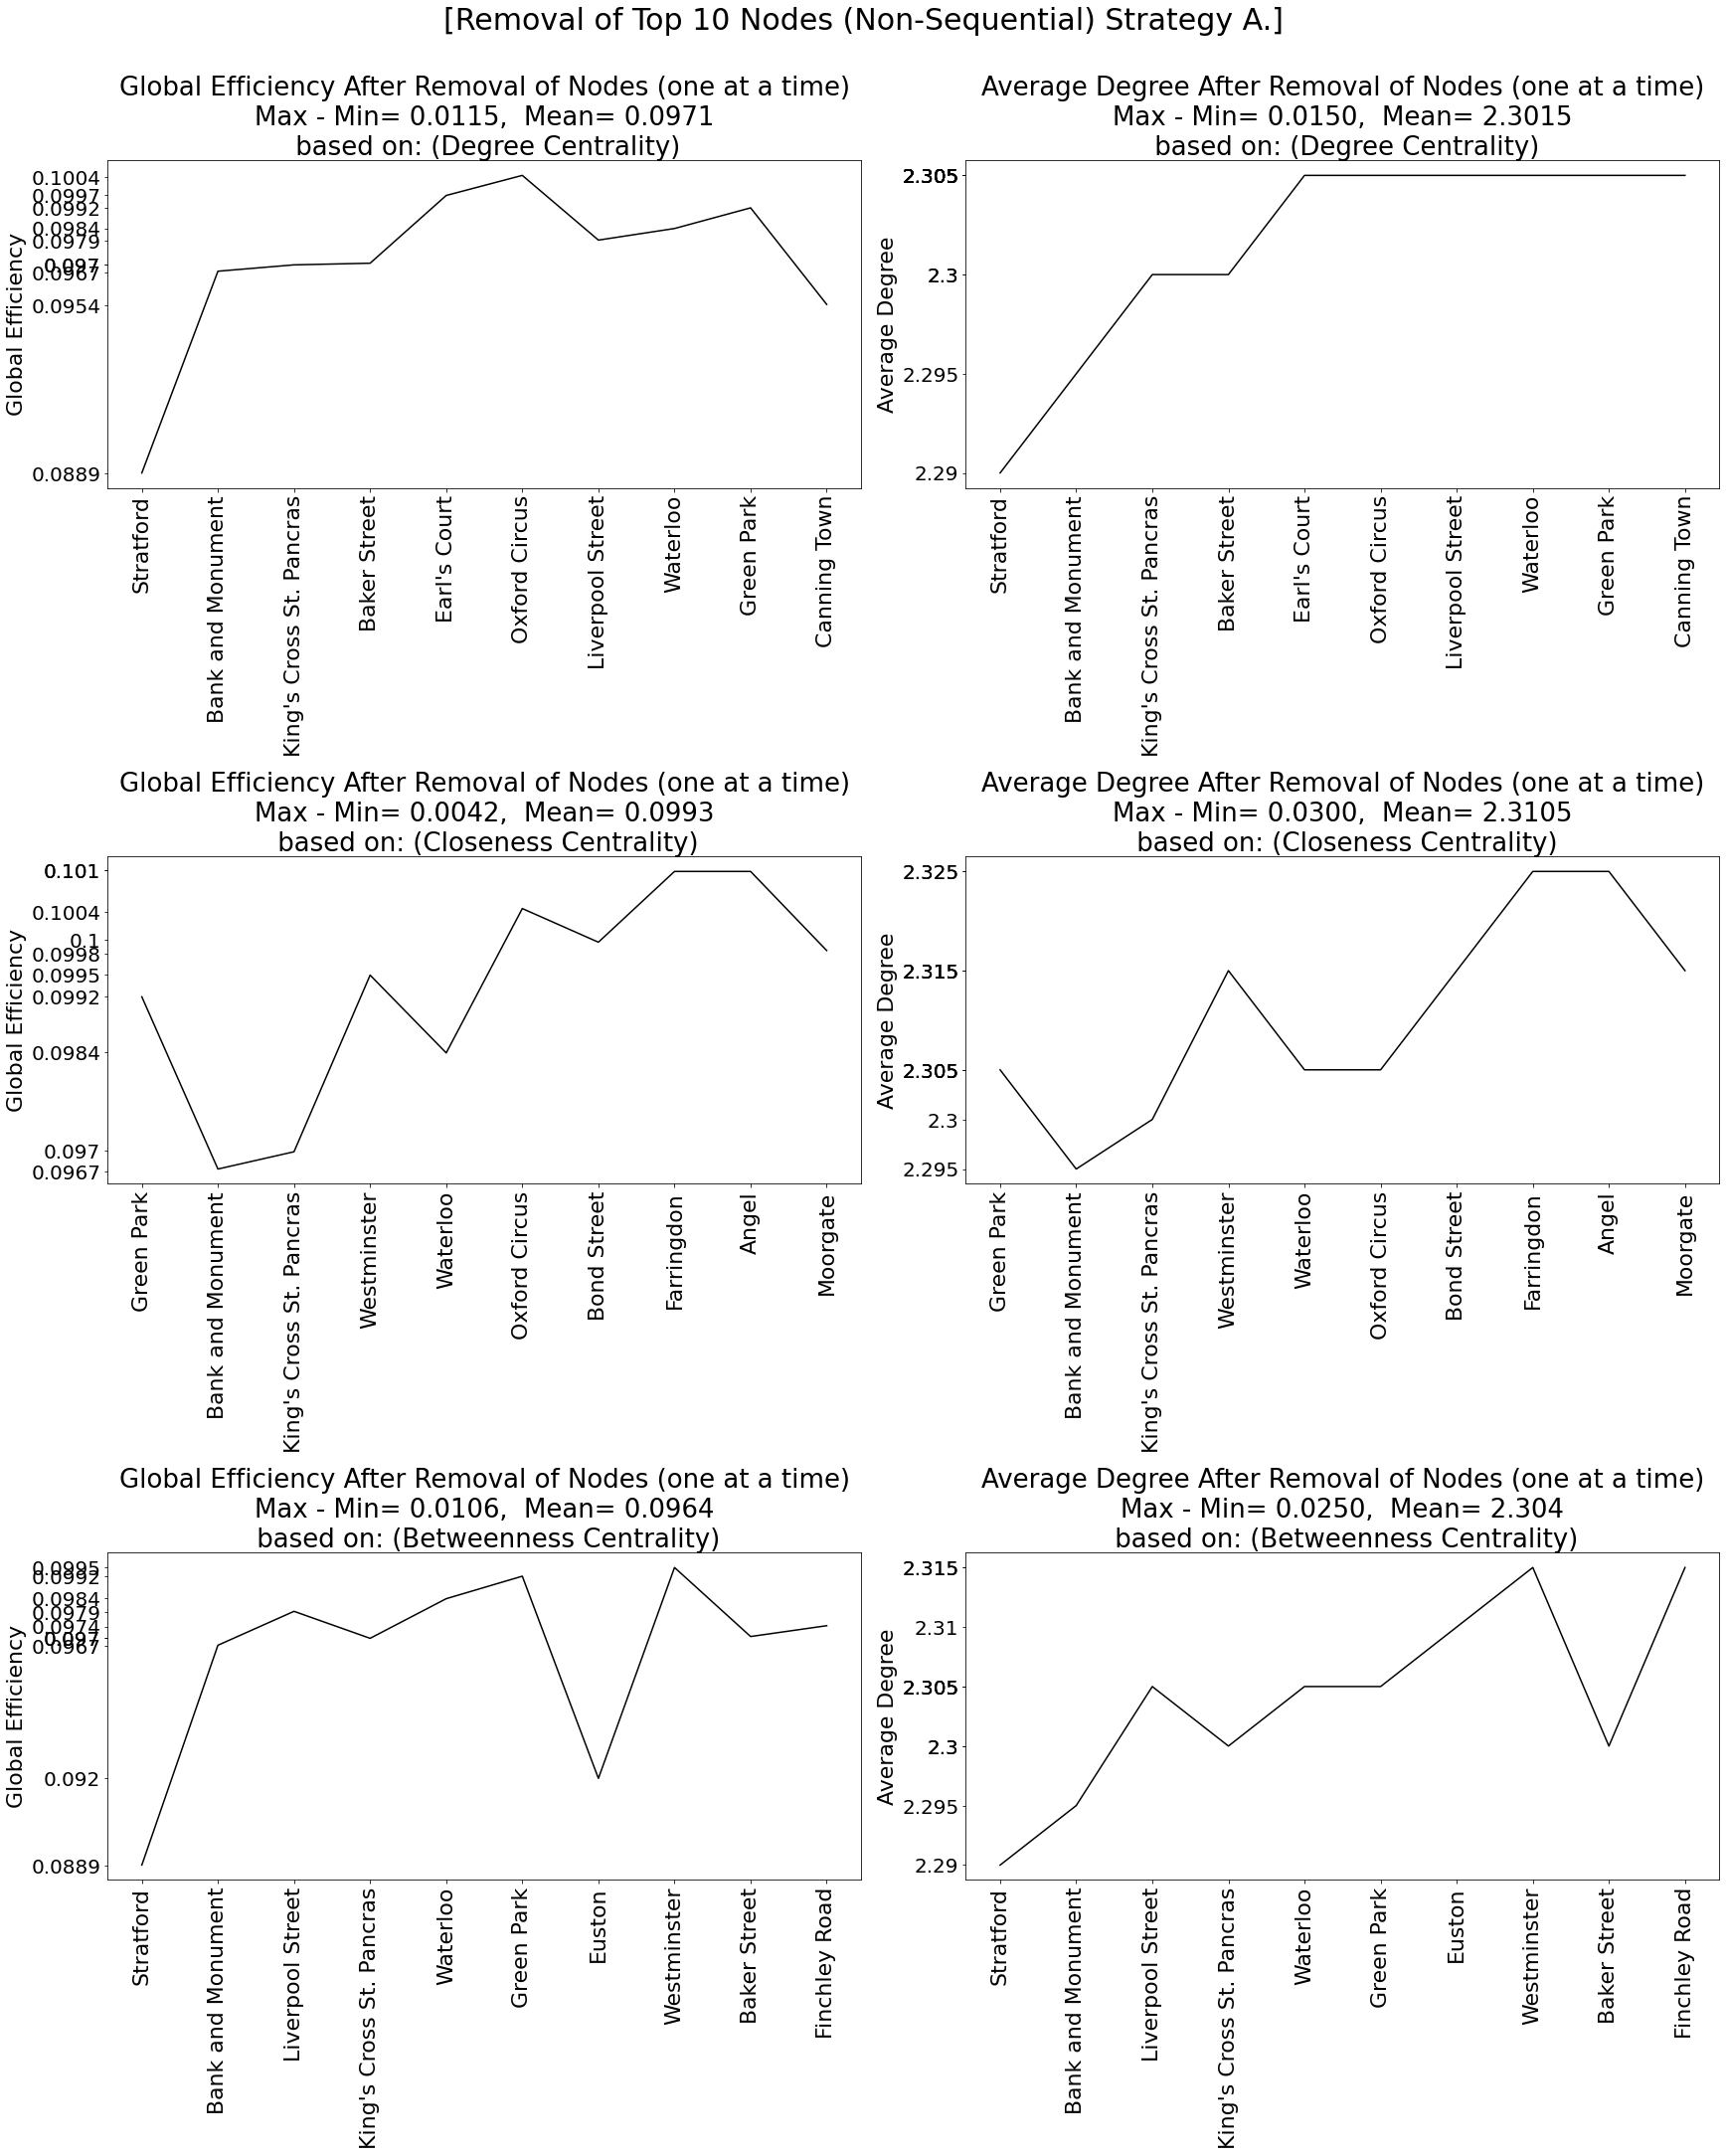

In [46]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 30), constrained_layout=True)
fig.suptitle('[Removal of Top 10 Nodes (Non-Sequential) Strategy A.]\n', fontsize=30)
col = 0
counter = 0
centrality_types = ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality']

for i in range(3):
    ax[i, col].plot(top_10_nodes_centrality[i].Removed_node, top_10_nodes_centrality[i].Glob_Eff, color="k")
    ax[i, col].set_ylabel('Global Efficiency', fontsize=22)
    ax[i, col].set_xticks(ticks=top_10_nodes_centrality[i].Removed_node)
    ax[i, col].set_xticklabels(labels=top_10_nodes_centrality[i].Removed_node, rotation=90, fontsize=22)
    ax[i, col].set_yticks(ticks=round(top_10_nodes_centrality[i].Glob_Eff, 4))
    ax[i, col].set_yticklabels(labels=round(top_10_nodes_centrality[i].Glob_Eff, 4), fontsize=20)
    ax[i, col].set_title(f'Global Efficiency After Removal of Nodes (one at a time)\nMax - Min= {diff_glob_deg_list[counter]:.4f},  Mean= {round(mean(top_10_nodes_centrality[i].Glob_Eff), 4)}\n based on: ({centrality_types[i]})', fontsize=26)

    counter = counter + 1
    if col == 0:
        col = 1
    else:
        col = 0

    ax[i, col].plot(top_10_nodes_centrality[i].Removed_node, top_10_nodes_centrality[i].Average, color="k")
    ax[i, col].set_ylabel('Average Degree', fontsize=22)
    ax[i, col].set_xticks(ticks=top_10_nodes_centrality[i].Removed_node)
    ax[i, col].set_xticklabels(labels=top_10_nodes_centrality[i].Removed_node, rotation=90, fontsize=22)
    ax[i, col].set_yticks(ticks=(round(top_10_nodes_centrality[i].Average, 3)))
    ax[i, col].set_yticklabels(labels=(round(top_10_nodes_centrality[i].Average, 3)), fontsize=20)
    ax[i, col].set_title(f'Average Degree After Removal of Nodes (one at a time)\nMax - Min= {diff_glob_deg_list[counter]:.4f},  Mean= {round(mean(top_10_nodes_centrality[i].Average), 4)}\n based on: ({centrality_types[i]})', fontsize=26)

    counter = counter + 1
    if col == 0:
        col = 1
    else:
        col = 0

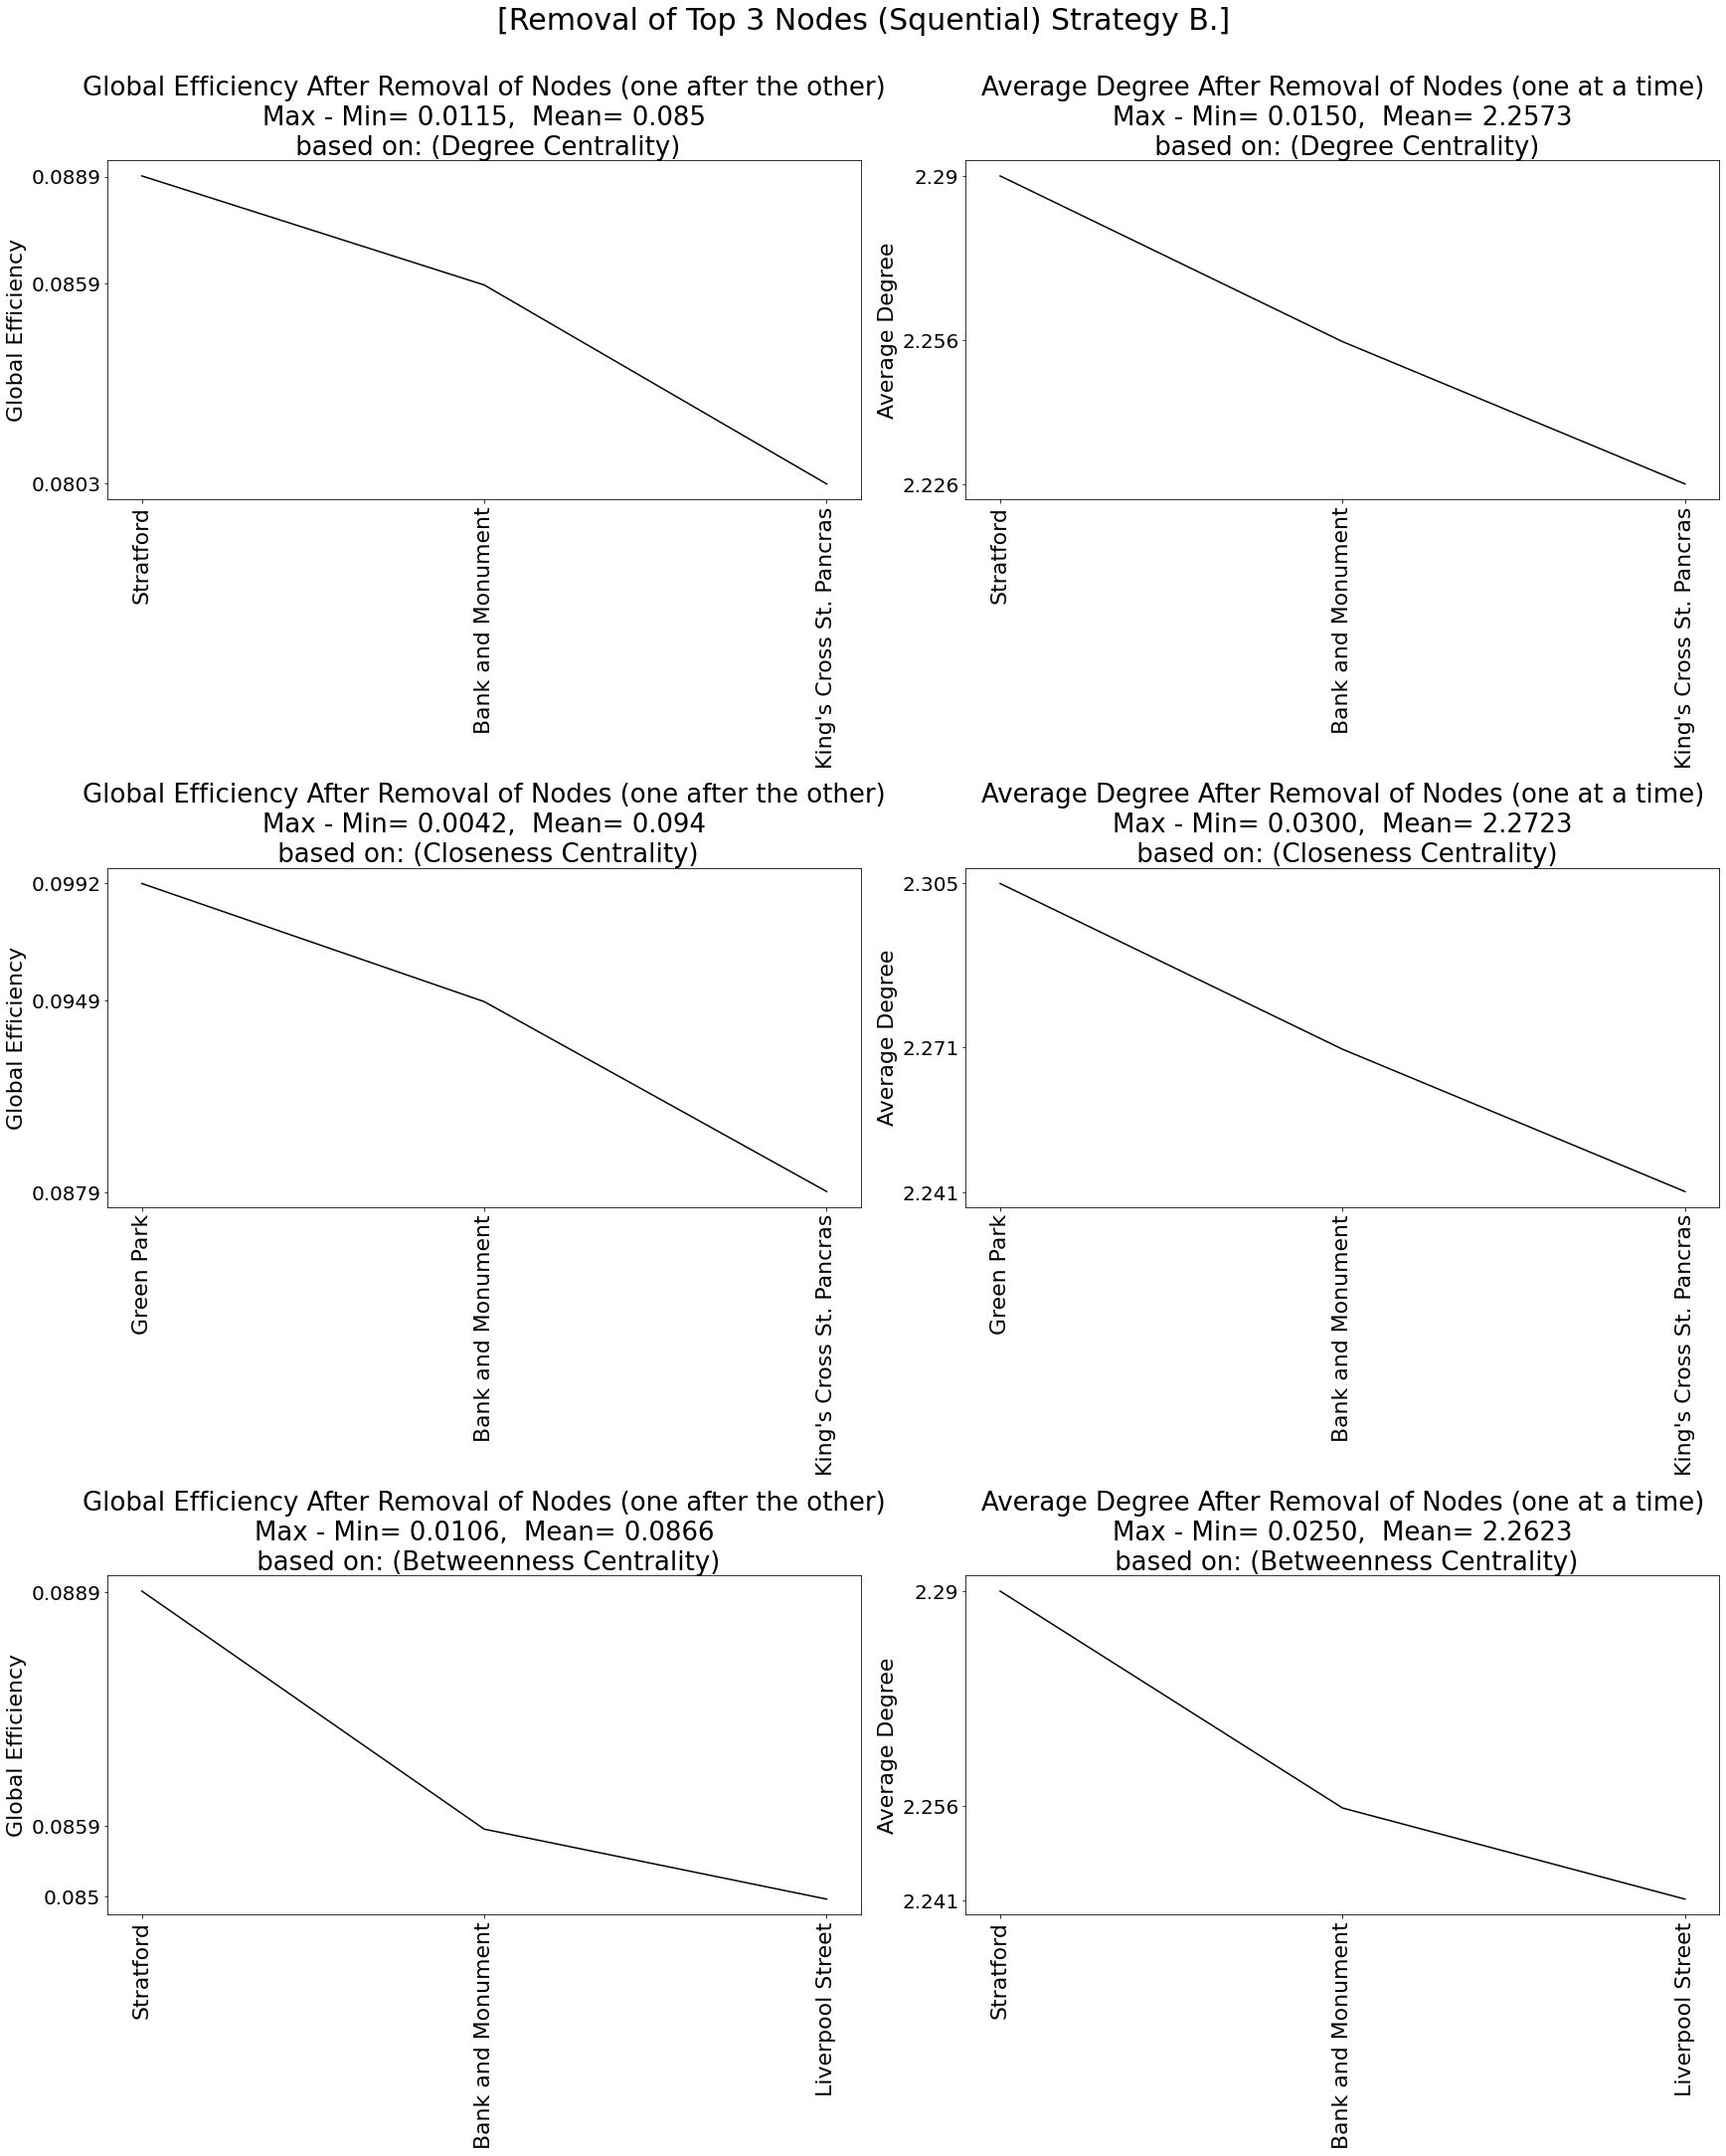

In [47]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 30), constrained_layout=True)
fig.suptitle('[Removal of Top 3 Nodes (Squential) Strategy B.]\n', fontsize=30)
col = 0
counter = 0
centrality_types = ['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality']

for i in range(3):
    ax[i, col].plot(top_3_nodes_centrality[i].Removed_node, top_3_nodes_centrality[i].Glob_Eff, color="k")
    ax[i, col].set_ylabel('Global Efficiency', fontsize=22)
    ax[i, col].set_xticks(ticks=top_3_nodes_centrality[i].Removed_node)
    ax[i, col].set_xticklabels(labels=top_3_nodes_centrality[i].Removed_node, rotation=90, fontsize=22)
    ax[i, col].set_yticks(ticks=round(top_3_nodes_centrality[i].Glob_Eff, 4))
    ax[i, col].set_yticklabels(labels=round(top_3_nodes_centrality[i].Glob_Eff, 4), fontsize=20)
    ax[i, col].set_title(f'Global Efficiency After Removal of Nodes (one after the other)\nMax - Min= {diff_glob_deg_list[counter]:.4f},  Mean= {round(mean(top_3_nodes_centrality[i].Glob_Eff), 4)}\n based on: ({centrality_types[i]})', fontsize=26)

    counter = counter + 1
    if col == 0:
        col = 1
    else:
        col = 0

    ax[i, col].plot(top_3_nodes_centrality[i].Removed_node, top_3_nodes_centrality[i].Average, color="k")
    ax[i, col].set_ylabel('Average Degree', fontsize=22)
    ax[i, col].set_xticks(ticks=top_3_nodes_centrality[i].Removed_node)
    ax[i, col].set_xticklabels(labels=top_3_nodes_centrality[i].Removed_node, rotation=90, fontsize=22)
    ax[i, col].set_yticks(ticks=(round(top_3_nodes_centrality[i].Average, 3)))
    ax[i, col].set_yticklabels(labels=(round(top_3_nodes_centrality[i].Average, 3)), fontsize=20)
    ax[i, col].set_title(f'Average Degree After Removal of Nodes (one at a time)\nMax - Min= {diff_glob_deg_list[counter]:.4f},  Mean= {round(mean(top_3_nodes_centrality[i].Average), 4)}\n based on: ({centrality_types[i]})', fontsize=26)

    counter = counter + 1
    if col == 0:
        col = 1
    else:
        col = 0

**II. Flows: weighted network**
    
In this section, you will include passengers into the underground, and assess whether different measures need to be used when flows are considered. The network to use in this section is the weighted network given to you in the coursework, where the flows of passengers were assigned to the links between stations.

**II.1. Consider the centrality measure derived in** ***I.***- indicating the most relevant stations for assessing the vulnerability of the underground. **What would you need to do to adjust this measure for a weighted network?** Recompute the ranking of the 10 most important nodes according to this **adjusted measure.** Do you find the same ones as ***in I.1***

In [48]:
G = file_network.copy()

v_weights = {(e1, e2): round(1./weight, 7) if weight != 0 else 0 for e1, e2, weight in G.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, v_weights, 'v_weights')

# Print edge list with attributes
list(G.edges(data=True))[0:3]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'v_weights': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'v_weights': 0.0001483}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'v_weights': 2.73e-05})]

In [49]:
# Let us compute the betweenness centrality for the network
bet_london_network = nx.betweenness_centrality(G, weight='v_weights')
betweenness_centrality = pd.DataFrame.from_dict(bet_london_network, columns=['betweenness'], orient='index').reset_index()
betweenness_centrality = betweenness_centrality.sort_values(by=['betweenness'], ascending=False)
betweenness_centrality.rename(columns={'index': 'stations'}, inplace=True)
betweenness_centrality[:10]

,stations,betweenness
16,Green Park,0.562563
50,Bank and Monument,0.498227
14,Waterloo,0.399803
15,Westminster,0.371736
51,Liverpool Street,0.332456
5,Stratford,0.327381
17,Bond Street,0.288177
150,Euston,0.279624
45,Oxford Circus,0.265752
341,Warren Street,0.249574


In [50]:
list_flow_glob_eff = []
list_flow_rem_node = []
list_dist_glob_eff = []
list_dist_rem_node = []

list_flow_avg_shrt = []
list_flow_rem_node = []
list_dist_avg_shrt = []
list_dist_rem_node = []

dist_betweenness_top1 = betweenness_centrality.stations[5]
dist_bet_london_network = G.copy()

avg_glob_eff = nx.global_efficiency(dist_bet_london_network)
list_dist_glob_eff.append(round(avg_glob_eff, 4))

avg_shrt_path = nx.average_shortest_path_length(dist_bet_london_network)
list_dist_avg_shrt.append(round(avg_shrt_path, 4))
list_dist_rem_node.append('None')

dist_bet_london_network.remove_node(dist_betweenness_top1)
S = [G.subgraph(c).copy() for c in nx.connected_components(dist_bet_london_network)]

print(f'After removal of the Stratford, our network splitted into {len(S)} components')
print(f'Number of nodes in the first component: {S[0].number_of_nodes()}')
print(f'Number of nodes in the first component: {S[1].number_of_nodes()}')
print(f'Number of nodes in the first component: {S[2].number_of_nodes()}')

After removal of the Stratford, our network splitted into 3 components
Number of nodes in the first component: 379
Number of nodes in the first component: 20
Number of nodes in the first component: 1


In [51]:
avg_glob_eff = nx.global_efficiency(S[0])
list_dist_glob_eff.append(round(avg_glob_eff, 4))

avg_shrt_path = nx.average_shortest_path_length(S[0])
list_dist_avg_shrt.append(round(avg_shrt_path, 4))
list_dist_rem_node.append(dist_betweenness_top1)

In [52]:
flow_betweenness_top1 = betweenness_centrality.stations[16]
flow_bet_london_network = G.copy()

avg_glob_eff = nx.global_efficiency(flow_bet_london_network)
list_flow_glob_eff.append(round(avg_glob_eff, 4))

avg_shrt_path = nx.average_shortest_path_length(flow_bet_london_network)
list_flow_avg_shrt.append(round(avg_shrt_path, 4))
list_flow_rem_node.append('None')

flow_bet_london_network.remove_node(flow_betweenness_top1)

avg_glob_eff = nx.global_efficiency(flow_bet_london_network)
list_flow_glob_eff.append(round(avg_glob_eff, 4))

avg_shrt_path = nx.average_shortest_path_length(flow_bet_london_network)
list_flow_avg_shrt.append(round(avg_shrt_path, 4))
list_flow_rem_node.append(flow_betweenness_top1)


df_flow_glob_eff = pd.DataFrame(list_flow_glob_eff, columns=['Average_glob_eff'])
df_flow_glob_eff['Removed_node'] = list_flow_rem_node

df_dist_avg_glob_eff = pd.DataFrame(list_dist_glob_eff, columns=['Average_glob_eff'])
df_dist_avg_glob_eff['Removed_node'] = list_dist_rem_node

df_flow_avg_shrt_path = pd.DataFrame(list_flow_avg_shrt, columns=['Average_paths'])
df_flow_avg_shrt_path['Removed_node'] = list_flow_rem_node

df_dist_avg_shrt_path = pd.DataFrame(list_dist_avg_shrt, columns=['Average_paths'])
df_dist_avg_shrt_path['Removed_node'] = list_dist_rem_node

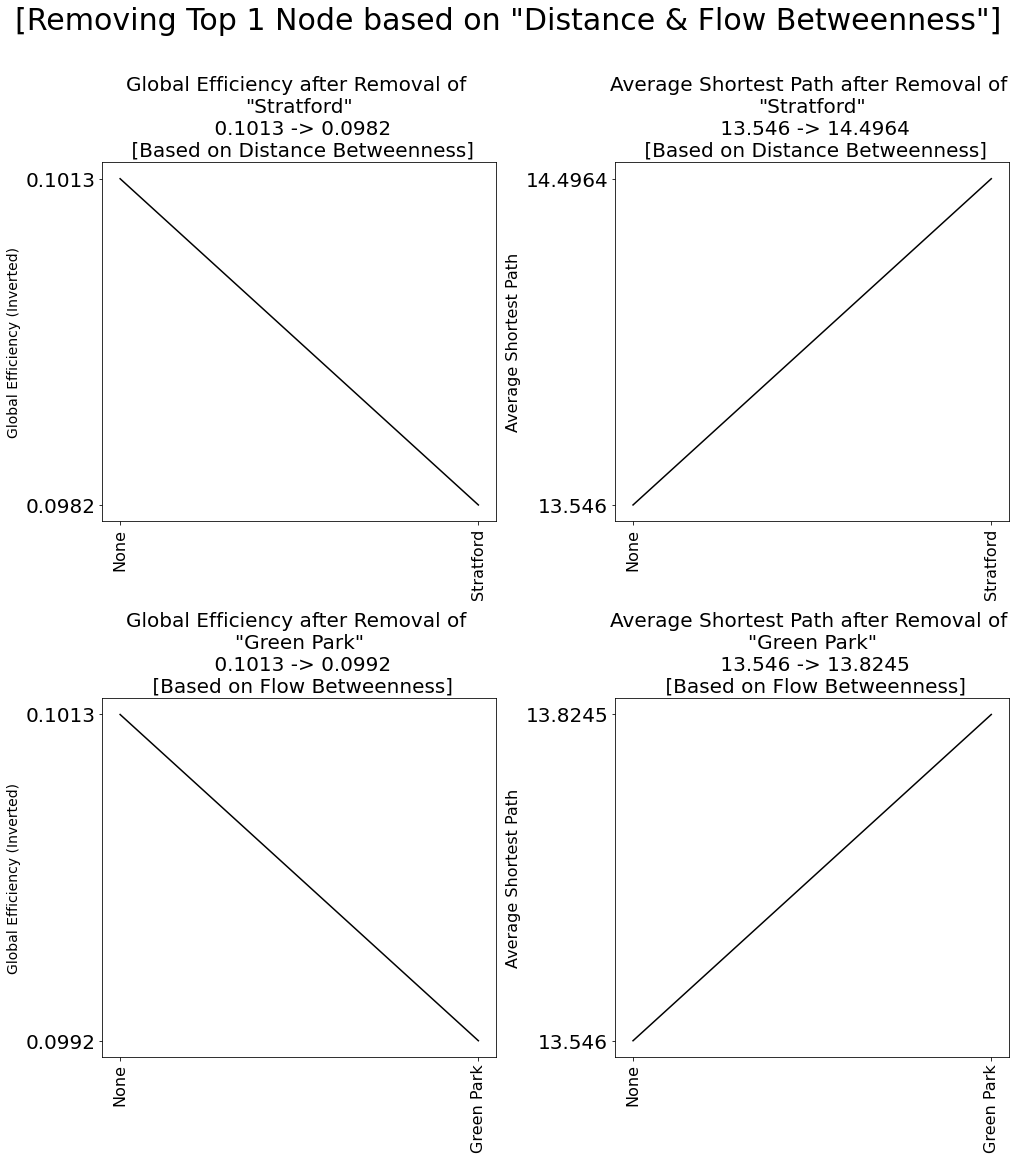

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 16), constrained_layout=True)
fig.suptitle('[Removing Top 1 Node based on "Distance & Flow Betweenness"]\n', fontsize=30)

for i in range(2):
    col = 0
    if i < 1:

        ax[i, col].plot(df_dist_avg_glob_eff.Removed_node, df_dist_avg_glob_eff.Average_glob_eff, color="k")
        ax[i, col].set_xticks(df_dist_avg_glob_eff.Removed_node)
        ax[i, col].set_yticks(df_dist_avg_glob_eff.Average_glob_eff)
        ax[i, col].set_ylabel('Global Efficiency (Inverted)', fontsize=14)
        ax[i, col].set_xticklabels(labels=df_dist_avg_glob_eff.Removed_node, rotation=90, fontsize=16)
        ax[i, col].set_yticklabels(labels=df_dist_avg_glob_eff.Average_glob_eff, fontsize=20)
        ax[i, col].set_title(f'Global Efficiency after Removal of \n"{df_dist_avg_glob_eff.Removed_node[1]}"\n {df_dist_avg_glob_eff.Average_glob_eff[0]} -> {df_dist_avg_glob_eff.Average_glob_eff[1]}\n [Based on Distance Betweenness]', fontsize=20)
        col = 1
        ax[i, col].plot(df_dist_avg_shrt_path.Removed_node, df_dist_avg_shrt_path.Average_paths, color="k")
        ax[i, col].set_xticks(df_dist_avg_shrt_path.Removed_node)
        ax[i, col].set_yticks(df_dist_avg_shrt_path.Average_paths)
        ax[i, col].set_ylabel('Average Shortest Path', fontsize=16)
        ax[i, col].set_xticklabels(labels=df_dist_avg_shrt_path.Removed_node, rotation=90, fontsize=16)
        ax[i, col].set_yticklabels(labels=df_dist_avg_shrt_path.Average_paths, fontsize=20)
        ax[i, col].set_title(f'Average Shortest Path after Removal of \n"{df_dist_avg_shrt_path.Removed_node[1]}"\n {df_dist_avg_shrt_path.Average_paths[0]} -> {df_dist_avg_shrt_path.Average_paths[1]}\n [Based on Distance Betweenness]', fontsize=20)
        col = 0

    else:
        ax[i, col].plot(df_flow_glob_eff.Removed_node, df_flow_glob_eff.Average_glob_eff, color="k")
        ax[i, col].set_xticks(df_flow_glob_eff.Removed_node)
        ax[i, col].set_yticks(df_flow_glob_eff.Average_glob_eff)
        ax[i, col].set_ylabel('Global Efficiency (Inverted)', fontsize=14)
        ax[i, col].set_xticklabels(labels=df_flow_glob_eff.Removed_node, rotation=90, fontsize=16)
        ax[i, col].set_yticklabels(labels=df_flow_glob_eff.Average_glob_eff, fontsize=20)
        ax[i, col].set_title(f'Global Efficiency after Removal of \n"{df_flow_glob_eff.Removed_node[1]}"\n {df_flow_glob_eff.Average_glob_eff[0]} -> {df_flow_glob_eff.Average_glob_eff[1]}\n [Based on Flow Betweenness]', fontsize=20)
        col = 1
        ax[i, col].plot(df_flow_avg_shrt_path.Removed_node, df_flow_avg_shrt_path.Average_paths, color="k")
        ax[i, col].set_xticks(df_flow_avg_shrt_path.Removed_node)
        ax[i, col].set_yticks(df_flow_avg_shrt_path.Average_paths)
        ax[i, col].set_ylabel('Average Shortest Path', fontsize=16)
        ax[i, col].set_xticklabels(labels=df_flow_avg_shrt_path.Removed_node, rotation=90, fontsize=16)
        ax[i, col].set_yticklabels(labels=df_flow_avg_shrt_path.Average_paths, fontsize=20)
        ax[i, col].set_title(f'Average Shortest Path after Removal of \n"{df_flow_avg_shrt_path.Removed_node[1]}"\n {df_flow_avg_shrt_path.Average_paths[0]} -> {df_flow_avg_shrt_path.Average_paths[1]}\n [Based on Flow Betweenness]', fontsize=20)

